In [1]:
import os
os.getcwd()

'C:\\Users\\anand\\OneDrive\\Desktop\\20190728_6pm_TrainData'

In [2]:
import numpy as np
import pandas as pd

# 1. Preprocessing Libraries
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder    #Dummification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold #Hyperparameter tuning, StratifiedKFold
# another way to cross-validate


# 2. Algorithm Import
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import AdaBoostClassifier
import plotly.graph_objs as go

# 3. Evaluation Library
from sklearn.metrics import confusion_matrix

# 4. Viz Lib
import matplotlib.pyplot as plt 
import seaborn as sns

# 5. Misc Lib
!pip install imblearn
#from imblearn.over_sampling import SMOTE   #Data/Class imbalance
import random
random.seed(123)
import warnings
warnings.filterwarnings('ignore')
!pip install fancy

In [3]:
from plotly.offline import init_notebook_mode, iplot, plot

### Reading all the three datasets

In [4]:
patient = pd.read_csv("Train.csv", header=0, na_values='?' )
hospdata = pd.read_csv("Train_HospitalizationData.csv",header=0, na_values='?')
hospdiag = pd.read_csv("Train_Diagnosis_TreatmentData.csv",header=0, na_values='?')
##
patient_t = pd.read_csv("Test.csv", header=0, na_values='?' )
hospdata_t = pd.read_csv("Test_HospitalizationData.csv",header=0, na_values='?')
hospdiag_t = pd.read_csv("Test_Diagnosis_TreatmentData.csv",header=0, na_values='?')
##

### Type description

In [5]:
type(patient)
type(hospdata)
type(hospdiag)
##
type(patient_t)
type(hospdata_t)
type(hospdiag_t)

pandas.core.frame.DataFrame

### Shape of datasets

In [6]:
patient.shape

(34650, 6)

In [7]:
patient_t.shape #without target

(14630, 5)

In [8]:
hospdata.shape

(34650, 9)

In [9]:
hospdata_t.shape


(14630, 9)

In [10]:
hospdiag.shape

(34650, 32)

In [11]:
hospdiag_t.shape

(14630, 32)

### Column details

In [12]:
patient.columns

Index(['patientID', 'race', 'gender', 'age', 'weight', 'readmitted'], dtype='object')

In [13]:
patient_t.columns

Index(['patientID', 'race', 'gender', 'age', 'weight'], dtype='object')

In [14]:
hospdata.columns

Index(['AdmissionID', 'patientID', 'Admission_date', 'Discharge_date',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'payer_code', 'medical_specialty'],
      dtype='object')

In [15]:
hospdata_t.columns

Index(['AdmissionID', 'patientID', 'Admission_date', 'Discharge_date',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'payer_code', 'medical_specialty'],
      dtype='object')

In [16]:
hospdiag.columns

Index(['patientID', 'num_lab_procedures', 'num_procedures', 'num_medications',
       'num_diagnoses', 'diagnosis_1', 'diagnosis_2', 'diagnosis_3',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide.metformin', 'glipizide.metformin', 'metformin.rosiglitazone',
       'metformin.pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [17]:
hospdiag_t.columns

Index(['patientID', 'num_lab_procedures', 'num_procedures', 'num_medications',
       'num_diagnoses', 'diagnosis_1', 'diagnosis_2', 'diagnosis_3',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide.metformin', 'glipizide.metformin', 'metformin.rosiglitazone',
       'metformin.pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

### Common id in all three datasets and their uniqueness

In [18]:
patient['patientID'].describe()

count       34650
unique      34650
top       PT19697
freq            1
Name: patientID, dtype: object

In [19]:
patient_t['patientID'].describe()

count       14630
unique      14630
top       PT73078
freq            1
Name: patientID, dtype: object

In [20]:
hospdata['patientID'].describe()

count       34650
unique      34650
top       PT19697
freq            1
Name: patientID, dtype: object

In [21]:
hospdata_t['patientID'].describe()

count       14630
unique      14630
top       PT73078
freq            1
Name: patientID, dtype: object

In [22]:
hospdiag['patientID'].describe()

count       34650
unique      34650
top       PT19697
freq            1
Name: patientID, dtype: object

In [23]:
hospdiag_t['patientID'].describe()

count       14630
unique      14630
top       PT73078
freq            1
Name: patientID, dtype: object

### Since all the IDs are unique we can right away merge the dataset 

In [24]:
hosp1= pd.merge(patient,hospdata,on=["patientID"])

In [25]:
hosp_pat = pd. merge(hosp1, hospdiag, on=['patientID'])


In [26]:
hosp1_t= pd.merge(patient_t,hospdata_t,on=["patientID"])

In [27]:
hosp_pat_test = pd. merge(hosp1_t, hospdiag_t, on=['patientID'])

### The merged dataframe

In [28]:
hosp_pat.dtypes

patientID                   object
race                        object
gender                      object
age                         object
weight                      object
readmitted                  object
AdmissionID                 object
Admission_date              object
Discharge_date              object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
num_diagnoses                int64
diagnosis_1                 object
diagnosis_2                 object
diagnosis_3                 object
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide       

In [29]:
hosp_pat_test.dtypes

patientID                   object
race                        object
gender                      object
age                         object
weight                      object
AdmissionID                 object
Admission_date              object
Discharge_date              object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
num_diagnoses                int64
diagnosis_1                 object
diagnosis_2                 object
diagnosis_3                 object
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide           

### Shape of dataset

In [30]:
hosp_pat.shape


(34650, 45)

In [31]:
hosp_pat_test.shape

(14630, 44)

### Describe the Dataset

In [32]:
hosp_pat.describe(include="all")

,patientID,race,gender,age,weight,readmitted,AdmissionID,Admission_date,Discharge_date,admission_type_id,...,miglitol,troglitazone,tolazamide,insulin,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed
count,34650,33571,34650,34650,1058,34650,34650,34650,34650,34650.000000,...,34650,34650,34650,34650,34650,34650,34650,34650,34650,34650
unique,34650,5,2,10,8,2,34650,912,925,NaN,...,2,2,2,4,4,2,2,2,2,2
top,PT19697,Caucasian,Female,[70-80),[75-100),NO,ADM12836,02-11-2014,28-01-2015,NaN,...,No,No,No,No,No,No,No,No,No,Yes
freq,1,25562,18222,8532,412,29891,1,56,58,NaN,...,34644,34649,34635,17168,34434,34648,34649,34649,19531,25829
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.081558,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.472163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
hosp_pat_test.describe(include="all")

,patientID,race,gender,age,weight,AdmissionID,Admission_date,Discharge_date,admission_type_id,discharge_disposition_id,...,miglitol,troglitazone,tolazamide,insulin,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed
count,14630,14198,14630,14630,481,14630,14630,14630,14630.000000,14630.000000,...,14630,14630,14630,14630,14630,14630,14630,14630,14630,14630
unique,14630,5,2,10,8,14630,488,497,NaN,NaN,...,2,1,2,4,4,2,2,1,2,2
top,PT73078,Caucasian,Female,[70-80),[75-100),ADM82681,2017-07-27,2017-09-01,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
freq,1,10830,7710,3545,205,1,45,50,NaN,NaN,...,14628,14630,14624,7229,14512,14629,14629,14630,8207,10895
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.069925,3.752563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.455693,5.417167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### First 5 records of the dataset

In [34]:
hosp_pat.head(5)

,patientID,race,gender,age,weight,readmitted,AdmissionID,Admission_date,Discharge_date,admission_type_id,...,miglitol,troglitazone,tolazamide,insulin,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed
0,PT11101,Caucasian,Male,[80-90),NaN,NO,ADM31792,18-07-2015,23-07-2015,2,...,No,No,No,Up,No,No,No,No,Ch,Yes
1,PT11102,Caucasian,Male,[70-80),NaN,NO,ADM42286,23-04-2016,29-04-2016,1,...,No,No,No,No,No,No,No,No,No,Yes
2,PT11103,NaN,Female,[60-70),NaN,NO,ADM43029,13-05-2016,17-05-2016,2,...,No,No,No,No,Up,No,No,No,Ch,Yes
3,PT11104,Caucasian,Female,[70-80),NaN,NO,ADM30585,16-06-2015,18-06-2015,1,...,No,No,No,No,No,No,No,No,No,Yes
4,PT11105,Caucasian,Female,[60-70),NaN,Within30days,ADM40516,08-03-2016,09-03-2016,1,...,No,No,No,Steady,No,No,No,No,No,Yes


All columns of the Dataset

In [35]:
hosp_pat_test.head(5)

,patientID,race,gender,age,weight,AdmissionID,Admission_date,Discharge_date,admission_type_id,discharge_disposition_id,...,miglitol,troglitazone,tolazamide,insulin,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed
0,PT60251,Caucasian,Female,[60-70),NaN,ADM71912,2016-08-19,2016-08-23,1,3,...,No,No,No,No,No,No,No,No,No,No
1,PT60252,Caucasian,Male,[50-60),NaN,ADM71036,2016-07-19,2016-07-23,3,6,...,No,No,No,Steady,No,No,No,No,Ch,Yes
2,PT60253,Caucasian,Female,[50-60),NaN,ADM77733,2017-02-28,2017-03-11,6,1,...,No,No,No,Down,No,No,No,No,Ch,Yes
3,PT60254,AfricanAmerican,Female,[40-50),NaN,ADM70695,2016-07-08,2016-07-12,3,18,...,No,No,No,No,No,No,No,No,No,Yes
4,PT60255,Caucasian,Female,[60-70),NaN,ADM83536,2017-09-08,2017-09-16,1,3,...,No,No,No,No,No,No,No,No,No,No


### Now Creating a list of categorical Attributes

In [36]:
hosp_pat_categ= ['race','age', 'gender', 'readmitted',
        'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'payer_code',
       'medical_specialty', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide.metformin', 'glipizide.metformin',
       'metformin.rosiglitazone', 'metformin.pioglitazone', 'change',
       'diabetesMed']

In [37]:
hosp_pat_categ_test= ['race','age', 'gender',
        'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'payer_code',
       'medical_specialty', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide.metformin', 'glipizide.metformin',
       'metformin.rosiglitazone', 'metformin.pioglitazone', 'change',
       'diabetesMed']

### Converting the same to Categorical

In [38]:
for i in hosp_pat[hosp_pat_categ]:
    hosp_pat[i] = hosp_pat[i].astype("category") 

In [39]:
for i in hosp_pat_test[hosp_pat_categ_test]:
    hosp_pat_test[i] = hosp_pat_test[i].astype("category") 

In [40]:
hosp_pat.dtypes

patientID                     object
race                        category
gender                      category
age                         category
weight                        object
readmitted                  category
AdmissionID                   object
Admission_date                object
Discharge_date                object
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
payer_code                  category
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
num_diagnoses                  int64
diagnosis_1                   object
diagnosis_2                   object
diagnosis_3                   object
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
g

In [41]:
hosp_pat_test.dtypes

patientID                     object
race                        category
gender                      category
age                         category
weight                        object
AdmissionID                   object
Admission_date                object
Discharge_date                object
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
payer_code                  category
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
num_diagnoses                  int64
diagnosis_1                   object
diagnosis_2                   object
diagnosis_3                   object
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
a

Number of NULL values in each Column

### Columns with null values

#### for train data

In [42]:
hosp_pat.isna().sum()

patientID                       0
race                         1079
gender                          0
age                             0
weight                      33592
readmitted                      0
AdmissionID                     0
Admission_date                  0
Discharge_date                  0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
payer_code                  14719
medical_specialty           16394
num_lab_procedures              0
num_procedures                  0
num_medications                 0
num_diagnoses                   0
diagnosis_1                     6
diagnosis_2                   179
diagnosis_3                   681
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

In [43]:
hosp_pat_NA = hosp_pat.loc[:,((hosp_pat.isna().sum())>0)]
hosp_pat_NA.isna().sum()

race                  1079
weight               33592
payer_code           14719
medical_specialty    16394
diagnosis_1              6
diagnosis_2            179
diagnosis_3            681
dtype: int64

#### for test data

In [44]:
hosp_pat_test.isna().sum()

patientID                       0
race                          432
gender                          0
age                             0
weight                      14149
AdmissionID                     0
Admission_date                  0
Discharge_date                  0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
payer_code                   6283
medical_specialty            7000
num_lab_procedures              0
num_procedures                  0
num_medications                 0
num_diagnoses                   0
diagnosis_1                     3
diagnosis_2                    65
diagnosis_3                   286
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

In [45]:
hosp_pat_NA_test = hosp_pat_test.loc[:,((hosp_pat.isna().sum())>0)]
hosp_pat_NA_test.isna().sum()

race                   432
weight               14149
payer_code            6283
medical_specialty     7000
diagnosis_1              3
diagnosis_2             65
diagnosis_3            286
dtype: int64

### Dropping columns with higher NA values

In [46]:
hosp_pat.drop(['patientID','weight','payer_code','medical_specialty'],axis=1,inplace=True)

In [47]:
hosp_pat.shape

(34650, 41)

In [48]:
hosp_pat_test.drop(['patientID','weight','payer_code','medical_specialty'],axis=1,inplace=True)

In [49]:
hosp_pat_test.shape

(14630, 40)

### Impuating Nan values with mode of each columns

In [50]:
diagnos=['race','diagnosis_1','diagnosis_2','diagnosis_3']
hosp_pat[diagnos]=hosp_pat[diagnos].fillna(hosp_pat.mode().iloc[0])

In [51]:
hosp_pat.isna().sum()

race                        0
gender                      0
age                         0
readmitted                  0
AdmissionID                 0
Admission_date              0
Discharge_date              0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
num_lab_procedures          0
num_procedures              0
num_medications             0
num_diagnoses               0
diagnosis_1                 0
diagnosis_2                 0
diagnosis_3                 0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

In [52]:
hosp_pat_test[diagnos]=hosp_pat_test[diagnos].fillna(hosp_pat.mode().iloc[0])

In [53]:
hosp_pat_test.isna().sum()

race                        0
gender                      0
age                         0
AdmissionID                 0
Admission_date              0
Discharge_date              0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
num_lab_procedures          0
num_procedures              0
num_medications             0
num_diagnoses               0
diagnosis_1                 0
diagnosis_2                 0
diagnosis_3                 0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
insulin   

### Creating a new column for Number days in Hospital

In [54]:
import datetime
hosp_pat.Discharge_date = pd.to_datetime(hosp_pat.Discharge_date, infer_datetime_format=True)
hosp_pat.Admission_date = pd.to_datetime(hosp_pat.Admission_date, infer_datetime_format=True)
##
hosp_pat_test.Discharge_date = pd.to_datetime(hosp_pat_test.Discharge_date, infer_datetime_format=True)
hosp_pat_test.Admission_date = pd.to_datetime(hosp_pat_test.Admission_date, infer_datetime_format=True)


In [55]:
hosp_pat['Days_in_hosptal'] = (hosp_pat.Discharge_date - hosp_pat.Admission_date).dt.days
hosp_pat_test['Days_in_hosptal'] = (hosp_pat_test.Discharge_date - hosp_pat_test.Admission_date).dt.days

### Fetching the Year of the Treatment

In [56]:
hosp_pat['years'] = (hosp_pat.Admission_date).dt.year

In [57]:
hosp_pat_test['years'] = (hosp_pat_test.Admission_date).dt.year

In [58]:
hosp_pat.drop(['AdmissionID', 'Admission_date','Discharge_date'],axis=1,inplace=True)

In [59]:
hosp_pat_test.drop(['AdmissionID', 'Admission_date','Discharge_date'],axis=1,inplace=True)

In [60]:
hosp_pat.head(5)

,race,gender,age,readmitted,admission_type_id,discharge_disposition_id,admission_source_id,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,Days_in_hosptal,years
0,Caucasian,Male,[80-90),NO,2,1,7,18,1,7,...,No,Up,No,No,No,No,Ch,Yes,5,2015
1,Caucasian,Male,[70-80),NO,1,3,7,40,4,16,...,No,No,No,No,No,No,No,Yes,6,2016
2,Caucasian,Female,[60-70),NO,2,1,1,39,1,12,...,No,No,Up,No,No,No,Ch,Yes,4,2016
3,Caucasian,Female,[70-80),NO,1,1,7,1,0,10,...,No,No,No,No,No,No,No,Yes,2,2015
4,Caucasian,Female,[60-70),Within30days,1,1,7,44,0,16,...,No,Steady,No,No,No,No,No,Yes,1,2016


In [61]:
hosp_pat_test.head(5)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,num_lab_procedures,num_procedures,num_medications,num_diagnoses,...,tolazamide,insulin,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,Days_in_hosptal,years
0,Caucasian,Female,[60-70),1,3,7,49,0,9,9,...,No,No,No,No,No,No,No,No,4,2016
1,Caucasian,Male,[50-60),3,6,1,42,3,28,7,...,No,Steady,No,No,No,No,Ch,Yes,4,2016
2,Caucasian,Female,[50-60),6,1,7,61,1,15,6,...,No,Down,No,No,No,No,Ch,Yes,11,2017
3,AfricanAmerican,Female,[40-50),3,18,1,35,4,29,8,...,No,No,No,No,No,No,No,Yes,4,2016
4,Caucasian,Female,[60-70),1,3,5,56,1,22,9,...,No,No,No,No,No,No,No,No,8,2017


In [62]:
hosp_pat.head()

,race,gender,age,readmitted,admission_type_id,discharge_disposition_id,admission_source_id,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,Days_in_hosptal,years
0,Caucasian,Male,[80-90),NO,2,1,7,18,1,7,...,No,Up,No,No,No,No,Ch,Yes,5,2015
1,Caucasian,Male,[70-80),NO,1,3,7,40,4,16,...,No,No,No,No,No,No,No,Yes,6,2016
2,Caucasian,Female,[60-70),NO,2,1,1,39,1,12,...,No,No,Up,No,No,No,Ch,Yes,4,2016
3,Caucasian,Female,[70-80),NO,1,1,7,1,0,10,...,No,No,No,No,No,No,No,Yes,2,2015
4,Caucasian,Female,[60-70),Within30days,1,1,7,44,0,16,...,No,Steady,No,No,No,No,No,Yes,1,2016


In [65]:
for i in hosp_pat.columns:
    print(hosp_pat[i].value_count())    

AttributeError: 'Series' object has no attribute 'value_count'

In [66]:
for i in hosp_pat.columns:
    print("\n___--"+i)
    print(hosp_pat[i].unique())


___--race
[Caucasian, AfricanAmerican, Other, Hispanic, Asian]
Categories (5, object): [Caucasian, AfricanAmerican, Other, Hispanic, Asian]

___--gender
[Male, Female]
Categories (2, object): [Male, Female]

___--age
[[80-90), [70-80), [60-70), [40-50), [90-100), [50-60), [30-40), [20-30), [10-20), [0-10)]
Categories (10, object): [[80-90), [70-80), [60-70), [40-50), ..., [30-40), [20-30), [10-20), [0-10)]

___--readmitted
[NO, Within30days]
Categories (2, object): [NO, Within30days]

___--admission_type_id
[2, 1, 5, 3, 6, 8, 7, 4]
Categories (8, int64): [2, 1, 5, 3, 6, 8, 7, 4]

___--discharge_disposition_id
[1, 3, 2, 18, 28, ..., 19, 10, 16, 12, 20]
Length: 26
Categories (26, int64): [1, 3, 2, 18, ..., 10, 16, 12, 20]

___--admission_source_id
[7, 1, 17, 9, 6, ..., 8, 13, 11, 14, 25]
Length: 17
Categories (17, int64): [7, 1, 17, 9, ..., 13, 11, 14, 25]

___--num_lab_procedures
[ 18  40  39   1  44  52  53   9  66  49  37  51   8  57  21  70  54  59
  34  26  41  36  65   3  16  31  

In [67]:
for i in hosp_pat_test.columns:
    print("\n___--"+i)
    print(hosp_pat_test[i].unique())


___--race
[Caucasian, AfricanAmerican, Hispanic, Other, Asian]
Categories (5, object): [Caucasian, AfricanAmerican, Hispanic, Other, Asian]

___--gender
[Female, Male]
Categories (2, object): [Female, Male]

___--age
[[60-70), [50-60), [40-50), [70-80), [80-90), [90-100), [30-40), [20-30), [0-10), [10-20)]
Categories (10, object): [[60-70), [50-60), [40-50), [70-80), ..., [30-40), [20-30), [0-10), [10-20)]

___--admission_type_id
[1, 3, 6, 2, 5, 8, 7, 4]
Categories (8, int64): [1, 3, 6, 2, 5, 8, 7, 4]

___--discharge_disposition_id
[3, 6, 1, 18, 5, ..., 28, 24, 15, 19, 17]
Length: 21
Categories (21, int64): [3, 6, 1, 18, ..., 24, 15, 19, 17]

___--admission_source_id
[7, 1, 5, 4, 6, ..., 8, 10, 22, 25, 14]
Length: 15
Categories (15, int64): [7, 1, 5, 4, ..., 10, 22, 25, 14]

___--num_lab_procedures
[ 49  42  61  35  56  74  55  65  45  38  62   2  29  59  15  48  33  34
   9  68  50  69  32  66  31  51  43   7  21  37  75  73  41  22  70  53
  71  18  36  44  52   1  30  72  16  47  4

### BINNING of columns : diagnosis_1, diagnosis_2, diagnosis_3

#### These are list of ICD 9 codes by US government.

List of ICD-9 codes 001–139: infectious and parasitic diseases

List of ICD-9 codes 140–239: neoplasms

List of ICD-9 codes 240–279: endocrine, nutritional and metabolic diseases, and immunity disorders

List of ICD-9 codes 280–289: diseases of the blood and blood-forming organs

List of ICD-9 codes 290–319: mental disorders

List of ICD-9 codes 320–389: diseases of the nervous system and sense organs

List of ICD-9 codes 390–459: diseases of the circulatory system

List of ICD-9 codes 460–519: diseases of the respiratory system

List of ICD-9 codes 520–579: diseases of the digestive system

List of ICD-9 codes 580–629: diseases of the genitourinary system

List of ICD-9 codes 630–679: complications of pregnancy, childbirth, and the puerperium

List of ICD-9 codes 680–709: diseases of the skin and subcutaneous tissue

List of ICD-9 codes 710–739: diseases of the musculoskeletal system and connective tissue

List of ICD-9 codes 740–759: congenital anomalies

List of ICD-9 codes 760–779: certain conditions originating in the perinatal period

List of ICD-9 codes 780–799: symptoms, signs, and ill-defined conditions

List of ICD-9 codes 800–999: injury and poisoning

List of ICD-9 codes E and V codes: external causes of injury and supplemental classification

In [68]:
import string
for i in ['diagnosis_1','diagnosis_2','diagnosis_3']:
    for j in hosp_pat.index:
        if str(hosp_pat[i].loc[j][0])=='E'or str(hosp_pat[i].loc[j][0])=='V' :
            hosp_pat.replace(to_replace = hosp_pat[i].loc[j], value = str(1001), inplace=True, regex=True)
    for k in hosp_pat_test.index:
        if str(hosp_pat_test[i].loc[k][0])=='E'or str(hosp_pat_test[i].loc[k][0])=='V' :
            hosp_pat_test.replace(to_replace = hosp_pat_test[i].loc[k], value = str(1001), inplace=True, regex=True)        

In [69]:
for i in ['diagnosis_1','diagnosis_2','diagnosis_3']:
        hosp_pat[i] = hosp_pat[i].astype("float64")
        hosp_pat_test[i] = hosp_pat_test[i].astype("float64")        

In [70]:
for i in ['diagnosis_1','diagnosis_2','diagnosis_3']:
    bins = [0,139,239,279,289,319,389,459,519,579,629,679,709,739,759,779,799,999,1010]
    labels =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
    hosp_pat[i] = pd.cut(hosp_pat[i], bins,labels=labels)
    


In [71]:
for i in ['diagnosis_1','diagnosis_2','diagnosis_3']:
    bins = [0,139,239,279,289,319,389,459,519,579,629,679,709,739,759,779,799,999,1010]
    labels =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
    hosp_pat_test[i] = pd.cut(hosp_pat_test[i], bins, labels=labels)
    #print (hosp_pat[i])

In [72]:
for i in ['diagnosis_1','diagnosis_2','diagnosis_3']:
        hosp_pat[i] = hosp_pat[i].astype("category")
        hosp_pat_test[i] = hosp_pat_test[i].astype("category")

In [73]:
for i in ['diagnosis_1','diagnosis_2','diagnosis_3']:
    
    print(hosp_pat[i].value_counts())

7     10366
3      3635
9      3117
8      3058
16     2603
17     2466
13     2089
10     1733
2      1491
1       896
12      867
5       787
6       443
18      440
11      353
4       285
14       21
15        0
Name: diagnosis_1, dtype: int64
7     10400
3      7799
8      3202
10     2473
16     1619
9      1385
4      1015
12     1014
17      965
5       947
18      911
2       895
13      647
1       629
6       464
11      234
14       51
15        0
Name: diagnosis_2, dtype: int64
3     10174
7      9908
8      2117
10     1875
18     1722
16     1541
9      1168
5      1034
4       849
17      775
13      677
12      667
2       661
1       638
6       632
11      169
14       43
15        0
Name: diagnosis_3, dtype: int64


In [74]:
for i in ['diagnosis_1','diagnosis_2','diagnosis_3']:
    print(hosp_pat_test[i].value_counts())

7     4441
3     1544
9     1297
8     1286
16    1130
17     978
13     885
10     738
2      651
1      383
12     321
5      317
6      198
18     176
11     143
4      130
14      12
15       0
Name: diagnosis_1, dtype: int64
7     4438
3     3334
8     1332
10    1062
16     700
9      565
17     430
4      418
12     391
5      391
2      384
18     346
13     265
1      252
6      221
11      84
14      17
15       0
Name: diagnosis_2, dtype: int64
3     4348
7     4201
8      873
10     774
18     695
16     641
9      536
5      467
4      344
17     298
12     296
13     282
6      281
2      275
1      247
11      59
14      13
15       0
Name: diagnosis_3, dtype: int64


In [75]:
readmit={'Within30days':1, 'NO':0}
hosp_pat.readmitted=[readmit[status] for status in hosp_pat.readmitted]

In [76]:
hosp_pat_categ2= ['race','age', 'gender', 'readmitted',
        'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
      'insulin', 'glyburide.metformin', 'glipizide.metformin',
       'metformin.rosiglitazone', 'metformin.pioglitazone', 'change',
         'diabetesMed','years']

In [77]:
hosp_pat_categ2_test = ['race','age', 'gender',
        'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
      'insulin', 'glyburide.metformin', 'glipizide.metformin',
       'metformin.rosiglitazone', 'metformin.pioglitazone', 'change',
         'diabetesMed','years']

In [78]:
for i in hosp_pat[hosp_pat_categ2]:
    hosp_pat[i] = hosp_pat[i].astype("category") 
for i in hosp_pat_test[hosp_pat_categ2_test]:
    hosp_pat_test[i] = hosp_pat_test[i].astype("category")

In [79]:
hosp_pat_num=hosp_pat.select_dtypes(include='int64').columns
hosp_pat_num

Index(['num_lab_procedures', 'num_procedures', 'num_medications',
       'num_diagnoses', 'Days_in_hosptal'],
      dtype='object')

In [80]:
hosp_pat_test_num=hosp_pat_test.select_dtypes(include='int64').columns
hosp_pat_test_num

Index(['num_lab_procedures', 'num_procedures', 'num_medications',
       'num_diagnoses', 'Days_in_hosptal'],
      dtype='object')

In [81]:
drugs=['metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide.metformin', 'glipizide.metformin',
       'metformin.rosiglitazone', 'metformin.pioglitazone']

In [82]:
for i in drugs:
    print(hosp_pat[i].value_counts(normalize=True)*100)

No        78.672439
Steady    19.489177
Up         1.209235
Down       0.629149
Name: metformin, dtype: float64
No        98.793651
Steady     1.073593
Up         0.098124
Down       0.034632
Name: repaglinide, dtype: float64
No        99.353535
Steady     0.608947
Up         0.025974
Down       0.011544
Name: nateglinide, dtype: float64
No        99.907648
Steady     0.086580
Up         0.002886
Down       0.002886
Name: chlorpropamide, dtype: float64
No        94.747475
Steady     4.730159
Up         0.323232
Down       0.199134
Name: glimepiride, dtype: float64
No    100.0
Name: acetohexamide, dtype: float64
No        87.968254
Steady    10.779221
Up         0.796537
Down       0.455988
Name: glipizide, dtype: float64
No        89.240981
Steady     9.365079
Up         0.865801
Down       0.528139
Name: glyburide, dtype: float64
No        99.976912
Steady     0.023088
Name: tolbutamide, dtype: float64
No        92.920635
Steady     6.761905
Up         0.242424
Down       0.075036
Nam

In [83]:
for i in drugs:
    print(hosp_pat_test[i].value_counts(normalize=True)*100)

No        78.790157
Steady    19.439508
Up         1.155161
Down       0.615174
Name: metformin, dtype: float64
No        98.851675
Steady     0.950103
Up         0.157211
Down       0.041012
Name: repaglinide, dtype: float64
No        99.323308
Steady     0.656186
Up         0.013671
Down       0.006835
Name: nateglinide, dtype: float64
No        99.917977
Steady     0.082023
Name: chlorpropamide, dtype: float64
No        95.105947
Steady     4.340396
Up         0.389610
Down       0.164046
Name: glimepiride, dtype: float64
No    100.0
Name: acetohexamide, dtype: float64
No        87.464115
Steady    11.237184
Up         0.738209
Down       0.560492
Name: glipizide, dtype: float64
No        89.056733
Steady     9.521531
Up         0.833903
Down       0.587833
Name: glyburide, dtype: float64
No        99.958988
Steady     0.041012
Name: tolbutamide, dtype: float64
No        92.932331
Steady     6.739576
Up         0.191388
Down       0.136705
Name: pioglitazone, dtype: float64
No      

### Creating the list of drugs to be dropped

In [84]:
drug_drop= [z for z in drugs if z not in {'metformin','glimepiride','glipizide','glyburide','insulin','pioglitazone','rosiglitazone'}]
drug_drop

['repaglinide',
 'nateglinide',
 'chlorpropamide',
 'acetohexamide',
 'tolbutamide',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'glyburide.metformin',
 'glipizide.metformin',
 'metformin.rosiglitazone',
 'metformin.pioglitazone']

In [85]:
hosp_pat.drop(drug_drop,axis=1,inplace=True)

In [86]:
hosp_pat_test.drop(drug_drop,axis=1, inplace=True)

In [87]:
hosp_pat.shape

(34650, 27)

In [88]:
hosp_pat_test.shape

(14630, 26)

In [89]:
hosp_pat_categ2.remove('readmitted')

In [90]:
hosp_pat_categ3=hosp_pat.select_dtypes(include="category").columns

In [91]:
hosp_pat_categ3_test=hosp_pat_test.select_dtypes(include="category").columns

In [92]:
hosp_pat_categ3_test

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'diagnosis_1',
       'diagnosis_2', 'diagnosis_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'years'],
      dtype='object')

In [93]:
hosp_pat_test.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'num_diagnoses', 'diagnosis_1',
       'diagnosis_2', 'diagnosis_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'Days_in_hosptal',
       'years'],
      dtype='object')

### Standardizing the numerical features

##### train data

In [94]:
scale = StandardScaler()
scale.fit(hosp_pat[hosp_pat_num])

StandardScaler(copy=True, with_mean=True, with_std=True)

##### test data

In [95]:
scale.fit(hosp_pat_test[hosp_pat_test_num])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [96]:
hosp_pat[hosp_pat_num]=scale.transform(hosp_pat[hosp_pat_num])
hosp_pat_test[hosp_pat_test_num]=scale.transform(hosp_pat_test[hosp_pat_test_num])

##### Dummifying train and test data

In [97]:
hosp_pat = pd.get_dummies(columns=hosp_pat_categ3,data=hosp_pat)

In [98]:
hosp_pat_test = pd.get_dummies(columns=hosp_pat_categ3_test,data=hosp_pat_test)

In [99]:
hosp_pat_test.shape

(14630, 162)

In [100]:
hosp_pat.shape

(34650, 172)

In [101]:
hosp_pat.head(5).transpose()

,0,1,2,3,4
num_lab_procedures,-1.240353,-0.135136,-0.185373,-2.094385,0.065813
num_procedures,-0.274910,1.403928,-0.274910,-0.834523,-0.834523
num_medications,-1.009129,0.034519,-0.429325,-0.661247,0.034519
num_diagnoses,-0.084558,0.899594,-1.068709,0.899594,0.899594
Days_in_hosptal,0.252696,0.589702,-0.084309,-0.758319,-1.095325
race_AfricanAmerican,0.000000,0.000000,0.000000,0.000000,0.000000
race_Asian,0.000000,0.000000,0.000000,0.000000,0.000000
race_Caucasian,1.000000,1.000000,1.000000,1.000000,1.000000
race_Hispanic,0.000000,0.000000,0.000000,0.000000,0.000000
race_Other,0.000000,0.000000,0.000000,0.000000,0.000000


In [102]:
hosp_pat_y = hosp_pat.readmitted_1
hosp_pat_X = hosp_pat.drop("readmitted_1",axis=1)

In [103]:
hosp_pat_X,hosp_pat_test = hosp_pat.align(hosp_pat_test, join='inner',axis=1)

In [ ]:
X_hosp.rename(columns={'age_[0-10)':'age_0_10','age_[10-20)':'age_10_20','age_[20-30)':'age_20_30','age_[30-40)':'age_30_40',
                       'age_[40-50)':'age_40_50','age_[50-60)':'age_50_60','age_[60-70)':'age_60_70','age_[70-80)':'age_70_80',
                       'age_[80-90)':'age_80_90','age_[90-100)':'age_90_100'}, 
                 inplace=True)

In [ ]:
X_hospt.rename(columns={'age_[0-10)':'age_0_10','age_[10-20)':'age_10_20','age_[20-30)':'age_20_30','age_[30-40)':'age_30_40',
                       'age_[40-50)':'age_40_50','age_[50-60)':'age_50_60','age_[60-70)':'age_60_70','age_[70-80)':'age_70_80',
                       'age_[80-90)':'age_80_90','age_[90-100)':'age_90_100'}, 
                 inplace=True)

In [104]:
#hosp_pat.to_csv("featuredatastdm.csv",index=False)

In [105]:
#hosp_pat_test.to_csv("testfinalstdm.csv",index=False)

### Train_test split

In [106]:
hosp_pat_X.shape

(34650, 161)

In [107]:
hosp_pat_test.shape

(14630, 161)

In [108]:
X_hosp, X_hospt,y_hosp, y_hospt= train_test_split(hosp_pat_X,hosp_pat_y, test_size=0.3, stratify=hosp_pat_y)

In [109]:
X_hospt.shape

(10395, 161)

## MODEL BUILDING

### RANDOM FOREST

In [119]:
clf=RandomForestClassifier(n_estimators=20,max_depth=5,class_weight='balanced',random_state=12,min_samples_leaf=4,
                            min_samples_split=5,criterion='entropy')
clf.fit(X=X_hosp, y=y_hosp)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=20, n_jobs=None, oob_score=False,
                       random_state=12, verbose=0, warm_start=False)

In [124]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

y_pred = clf.predict(X_hospt)
print(accuracy_score(y_hospt,y_pred))
y_pred = clf.predict(X_hosp)
print(accuracy_score(y_hosp ,y_pred))
print(recall_score(y_hosp,y_pred,pos_label=1))

0.5866281866281866
0.5938569367140796
0.666166316421495


In [181]:
clf.feature_importances_

XGBoostError: need to call fit or load_model beforehand

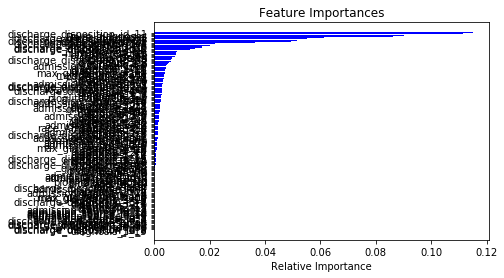

In [148]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
features = X_hosp.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
rftest=clf.predict(hosp_pat_test)

In [ ]:
sample=pd.read_csv("samplesubmission.csv",header=0)
sample.head()

In [ ]:
sample.readmitted=rftest
sample.readmitted.value_counts()

In [ ]:
sample.to_csv("rft_2585B56.csv",index=False)

### Decision Tree

In [169]:
clf = DecisionTreeClassifier(max_depth=6,max_features='auto',min_samples_leaf=10,min_samples_split=3,criterion='gini',class_weight='balanced')
#Using the object created for decision Trees to fit on train data
clf.fit(X_hosp, y_hosp)

#feat_importance(clf.feature_importances_,"Decision Tree")

#Using the object created for decision Trees to predict on validation data
train_pred_dt=clf.predict(X_hosp)
print(classification_report(y_hosp,train_pred_dt))
test_pred_dt =clf.predict(X_hospt)
print(classification_report(y_hospt,test_pred_dt))
#plot_learning_curve(clf, title='DT',X=X_train, y=y_train)

print(recall_score(y_hosp,train_pred_dt,average='macro'))
print(recall_score(y_hospt,test_pred_dt,average='macro'))
test_pred = clf.predict(hosp_pat_test)

              precision    recall  f1-score   support

           0       0.91      0.47      0.62     20924
           1       0.17      0.70      0.28      3331

    accuracy                           0.50     24255
   macro avg       0.54      0.58      0.45     24255
weighted avg       0.81      0.50      0.57     24255

              precision    recall  f1-score   support

           0       0.90      0.46      0.61      8967
           1       0.17      0.68      0.27      1428

    accuracy                           0.49     10395
   macro avg       0.53      0.57      0.44     10395
weighted avg       0.80      0.49      0.56     10395

0.5848471726040765
0.5710530113684819


In [170]:
sample1=pd.read_csv("samplesubmission.csv",header=0)
sample1.head()


,patientID,readmitted
0,PT60251,0
1,PT60252,0
2,PT60253,0
3,PT60254,0
4,PT60255,0


In [ ]:
sample1.readmitted=test_pred
sample1.readmitted.value_counts()

In [ ]:
sample1.to_csv("dt_2585B56.csv",index=False)

### XGboost

In [199]:
X_hosp.rename(columns={'age_[0-10)':'age_0_10','age_[10-20)':'age_10_20','age_[20-30)':'age_20_30','age_[30-40)':'age_30_40',
                       'age_[40-50)':'age_40_50','age_[50-60)':'age_50_60','age_[60-70)':'age_60_70','age_[70-80)':'age_70_80',
                       'age_[80-90)':'age_80_90','age_[90-100)':'age_90_100'}, 
                 inplace=True)

In [200]:
X_hospt.rename(columns={'age_[0-10)':'age_0_10','age_[10-20)':'age_10_20','age_[20-30)':'age_20_30','age_[30-40)':'age_30_40',
                       'age_[40-50)':'age_40_50','age_[50-60)':'age_50_60','age_[60-70)':'age_60_70','age_[70-80)':'age_70_80',
                       'age_[80-90)':'age_80_90','age_[90-100)':'age_90_100'}, 
                 inplace=True)

In [201]:
from xgboost import XGBClassifier


XGB_model = XGBClassifier(n_estimators=10,max_depth=3,learning_rate=0.01,max_iter=5, tol=None,n_jobs=-1,
                          random_state=7,reg_alpha=1,reg_lambda=1)
XGB_model.fit(X_hosp, y_hosp)
y_pred = XGB_model.predict(X_hospt)
print(recall_score(y_hospt,y_pred))

0.0


In [202]:
XGB = XGBClassifier(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 2),
     'n_estimators':[100],
     'max_depth': [10, 15, 20, 25]
}

 
CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv= 10)

In [ ]:
%time CV_XGB.fit(X = X_hosp, y=y_hosp)

In [ ]:
X_hosp.head(2).transpose()

In [ ]:
best_xgb_model = CV_XGB.best_estimator_
print (CV_XGB.best_score_, CV_XGB.best_params_)

In [ ]:
y_pred_test=best_xgb_model.predict(X_hospt)

In [ ]:
print(recall_score(y_hospt,y_pred_test))

In [ ]:
xg_pred_test=best_xgb_model.predict(hosp_pat_test)

In [ ]:
sample2.readmitted=xg_pred_test
sample2.readmitted.value_counts()

In [ ]:
sample2.readmitted.head(5)

In [ ]:
sample2.to_csv("xgb_2585b56.csv", index=False)